# Tree-Structured Parzen Estimator Method

What is the Tree-Structured Parzen Estimator method?

The Tree-Structured Parzen Estimator (TPE) method is a powerful and intuitive approach for optimizing functions, often used in the process of hyperparameter tuning for ML algorithms to get the best performance. TPE combines the principles of Bayesian optimization and tree-based search, making it an efficient and effective method for finding the best set of hyperparameters for a given ML model.

At its core, TPE operates by modeling the relationship between hyperparameters and the performance of an ML model as a probabilistic distribution. It divides the search space into two parts: a good space and a bad space. The goal is to allocate more search effort to the good space, where better hyperparameter combinations are likely to be fou

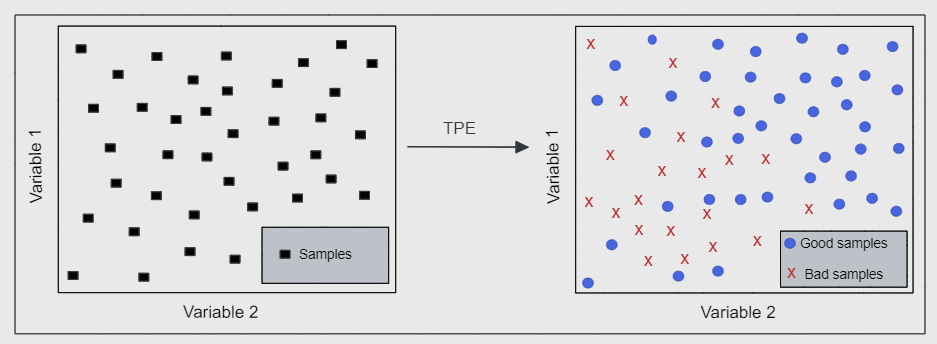

Initially, TPE lacks awareness of the good and bad distributions, and this is the phase where exploration occurs. TPE begins by randomly sampling a set of configurations (hyperparameter values) and evaluating their performance. Based on the performance, the configurations are labeled as good or bad.

TPE maintains two probability distributions:

The hyperparameters that have resulted in better model performance.

The hyperparameters that have led to worse performance.

These distributions are updated iteratively as TPE explores different hyperparameter configurations. The idea is to sample new hyperparameters from the distribution of the good space to increase the chances of finding an optimal set that will provide better ML model perf

Benefits of the TPE method : 

One of the key advantages of TPE is its ability to adaptively allocate resources. It intelligently balances the exploration of new hyperparameters with the exploitation of promising ones, improving search efficiency. Additionally, TPE is relatively easy to implement and has been shown to outperform traditional grid and random search methods in terms of finding optimal hyperparameters.

TPE provides a clever and efficient approach to hyperparameter tuning by modeling the search space as probability distributions. TPE focuses on the most promising configurations, providing a powerful tool for optimizing ML models. This helps practitioners to achieve better performance with less computational effort.ormance.nd.

# 1.1. Import Important packages
First, we import important Python packages that will do the following tasks:

Load the dataset.
Clean the dataset.
Process the dataset using feature engineering techniques.
Create and train machine learning model (logistic regression).
Check machine learning model performance.
Implement the grid search method.
Identify combination of hyperparameters that provide the best results.

In [5]:
# import important modules
import numpy as np
import pandas as pd

# sklearn modules
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")
# seeding
np.random.seed(123)

# 1.2 : load the Dataset and perform EDA

In [6]:
# load data
data_path = "loan_data_set.csv"

data = pd.read_csv(data_path)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
data.shape

(614, 13)

In [8]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# 1.3 : Check for missing values

In [11]:
round(100*(data.isnull().sum()/(len(data.index))),2)

,0
Loan_ID,0.00
Gender,2.12
Married,0.49
Dependents,2.44
Education,0.00
Self_Employed,5.21
ApplicantIncome,0.00
CoapplicantIncome,0.00
LoanAmount,3.58
Loan_Amount_Term,2.28


In [12]:
data['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [13]:
data['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


In [14]:
# replace with numerical values
data['Dependents'].replace('3+', 3,inplace=True)
data['Loan_Status'].replace('N', 0,inplace=True)
data['Loan_Status'].replace('Y', 1,inplace=True)

In [15]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [16]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [17]:
# handle the missing data
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

In [18]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [19]:
# drop the ID column
data = data.drop('Loan_ID',axis=1)

In [20]:
data.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


# 1.4 : Evaluate class distribution

In [21]:
data.Loan_Status.value_counts()

,count
Loan_Status,
1,422
0,192


# 1.5. Split Feature and Target variables

In [22]:
#split features and target from  data
X = data.drop('Loan_Status',axis = 1)
y = data.Loan_Status.values

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


In [24]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [25]:
X.Credit_History.value_counts()

,count
Credit_History,
1.0,525
0.0,89


# 1.6. Preprocess the features
However, before we train the machine learning model, we need to transform our features into numerical values so that the machine learning model can understand the data. In this case, we will use:

The MinMaxScaler() method from scikit-learn to scale the minimum and maximum values to be 0 and 1, respectively, for the columns with int64 and float64 data types.
The get_dummies() method from pandas to convert categorical variables into indicator variables. These variables will have a value of 0 or 1. This method can automatically identify categorical variables and convert them into indicator variables with a value of 0 or 1.

In [26]:
# scale the numerical columns with MinMaxScaler()
X["ApplicantIncome"] = MinMaxScaler().fit_transform(X["ApplicantIncome"].values.reshape(-1,1))
X["LoanAmount"] = MinMaxScaler().fit_transform(X["LoanAmount"].values.reshape(-1,1))
X["CoapplicantIncome"] = MinMaxScaler().fit_transform(X["CoapplicantIncome"].values.reshape(-1,1))
X["Loan_Amount_Term"] = MinMaxScaler().fit_transform(X["Loan_Amount_Term"].values.reshape(-1,1))

# change categorical features to numerical with get_dummies()
X = pd.get_dummies(X)

# convert the DataFrame to a NumPy array.
X = X.to_numpy()

In [27]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.070489,0.0,0.172214,0.74359,1.0,False,True,True,False,False,True,False,False,True,False,True,False,False,False,True
1,0.05483,0.036192,0.172214,0.74359,1.0,False,True,False,True,False,False,True,False,True,False,True,False,True,False,False
2,0.03525,0.0,0.082489,0.74359,1.0,False,True,False,True,False,True,False,False,True,False,False,True,False,False,True
3,0.030093,0.056592,0.160637,0.74359,1.0,False,True,False,True,False,True,False,False,False,True,True,False,False,False,True
4,0.072356,0.0,0.191027,0.74359,1.0,False,True,True,False,False,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.034014,0.0,0.089725,0.74359,1.0,True,False,True,False,False,True,False,False,True,False,True,False,True,False,False
610,0.04893,0.0,0.044863,0.358974,1.0,False,True,False,True,True,False,False,False,True,False,True,False,True,False,False
611,0.097984,0.00576,0.353111,0.74359,1.0,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True
612,0.091936,0.0,0.257598,0.74359,1.0,False,True,False,True,False,False,False,True,True,False,True,False,False,False,True


In [30]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.5 MB/s eta 0:00:00


# 1.7. Train a base machine learning model¶
In this example, we will train the histogram-based Gradient Boosting algorithm with default hyperparameter values using the cross-validation technique to check the model performance.

In [37]:
# import the algorithm

from sklearn.ensemble import HistGradientBoostingClassifier

In [38]:
# create a classifier
hist_classifier = HistGradientBoostingClassifier()

We will use the cross_val_score() method from scikit-learn to train and evaluate a machine learning model across numerous folds of the dataset. This cross-validation method provides a more comprehensive understanding of the model’s performance across the entire dataset than a simple train/test split.

To use the cross_val_score() method, we need to define the following parameters:

estimator: The machine learning model object to fit the data
X: The data/features to fit the machine learning model on
y: The target variable of the model classification or regression tasks
scoring: The evaluation error metric to use
cv: The number of splits to use (example 3).
The main goal is to prevent model over-fitting and promote model generalization.

Note: The machine learning model’s performance will be evaluated using the f1_score evaluation metric. We use f1_score because we have an unequal number of classes in the Loan_Status variable.

In [39]:
# define a function to evaluate f1_score
def f1_scorer(estimator, X, y):
    y_preds = estimator.predict(X)
    f1 = f1_score(y, y_preds, average='macro')
    return round(f1, 4)

In [40]:
# implement and run the cross_val_score method
score = cross_val_score(estimator=hist_classifier,
                        X=X,
                        y=y,
                        scoring=f1_scorer,
                        cv=3,
                        n_jobs=-1)

# print the mean score
print(round(score.mean(), 4))

0.71


The mean score of our machine learning model is 0.71. We need to improve the model performance in order to produce better results.

# 1.8. Implement the Tree-Structured Parzen Estimators method
Since we know how well the machine learning model works with the default hyperparameter values, we can try to improve the model’s performance by using the Tree-Structured Parzen Estimators method to find the combination of hyperparameter values that can give an F1-score of more than 0.5671.

The histogram-based Gradient Boosting algorithm has multiple hyperparameters, as shown below (see the documentation):

HistGradientBoostingClassifier(loss='log_loss', *, learning_rate=0.1, max_iter=100, max_leaf_nodes=31, max_depth=None, min_samples_leaf=20, l2_regularization=0.0, max_bins=255, categorical_features=None, monotonic_cst=None, interaction_cst=None, warm_start=False, early_stopping='auto', scoring='loss', validation_fraction=0.1, n_iter_no_change=10, tol=1e-07, verbose=0, random_state=None, class_weight=None)

However, for this example, we will use the following important hyperparameters to find the right combination of their values to get an F1-score greater than  0.71.

loss: The loss function used in the boosting process

learning_rate: The learning rate used as a multiplicative factor for the leaves values

max_iter: Determines the maximum number of iterations of the boosting process
early_stopping: Can be either True or False

warm_start: Reuses the solution of the previous call to fit when set to True

To implement the Tree-Structured Parzen Estimators method using the Optuna library, we need to define the following important parameters.

Search space: The list of parameters names as variable names and distributions or lists of parameters to try (trial). This can be a categorical, float, or integer parameter.
objective function: The function used to evaluate a given configuration of hyperparameters

In [48]:
# import Optuna
import optuna
from optuna.samplers import TPESampler



# define the objective function
def objective(trial):

  # define the search space outside the objective function
    loss_choices = ['log_loss']
    learning_rate_choices = [0.001, 0.1, 0.01]
    early_stopping_choices = [True, False]
    warm_start_choices = [True, False]
    # define the search space using the pre-defined choices
    max_iter = trial.suggest_int('max_iter', 50, 400, 10)
    loss = trial.suggest_categorical('loss', loss_choices)  # Use pre-defined choices
    learning_rate = trial.suggest_categorical('learning_rate', learning_rate_choices)  # Use pre-defined choices
    early_stopping = trial.suggest_categorical('early_stopping', early_stopping_choices)  # Use pre-defined choices
    warm_start = trial.suggest_categorical('warm_start', warm_start_choices)  # Use pre-defined choices

    # configure the model with specific hyperparameters
    clf = HistGradientBoostingClassifier(max_iter=max_iter,
                                         loss=loss,
                                         learning_rate=learning_rate,
                                         early_stopping=early_stopping,
                                         warm_start=warm_start)

    # train the model and calculate the score
    score = cross_val_score(clf, X, y, scoring=f1_scorer).mean()
    score = round(score, 4)

    # return the score
    return score

Our objective function uses cross-validation techniques to evaluate the performance of the histogram-based Gradient Boosting algorithm and finally calculate the average performance score.

Finally, we use the create_study() method to manage and perform the optimization task. We need to provide the following parameters to the method.

Name of the study

The direction of the optimization process (Maximize or minimize)

The optimization method to use

In [50]:
# create a study object
study = optuna.create_study(study_name="HIST_optimization",
                            direction="maximize",
                            sampler=TPESampler())

[I 2024-11-07 07:38:13,864] A new study created in memory with name: HIST_optimization


As shown in the above block of code, the name of the study object is called HIST_optimization. The direction of the optimization process is maximize. This means that the higher the score of the machine learning model, the better the performance. We also, define the optimization method to use, which is TPESampler().

The last step is to pass the objective function created and the number of trials to the optimize() method of the study object.

In this case, the number of trials is 30.

In [51]:
#  pass the objective function to the optimize() method and the number of trials
study.optimize(objective, n_trials=30)

[I 2024-11-07 07:38:21,937] Trial 0 finished with value: 0.7261 and parameters: {'max_iter': 190, 'loss': 'log_loss', 'learning_rate': 0.01, 'early_stopping': False, 'warm_start': False}. Best is trial 0 with value: 0.7261.
[I 2024-11-07 07:38:24,205] Trial 1 finished with value: 0.7013 and parameters: {'max_iter': 290, 'loss': 'log_loss', 'learning_rate': 0.1, 'early_stopping': False, 'warm_start': False}. Best is trial 0 with value: 0.7261.
[I 2024-11-07 07:38:25,313] Trial 2 finished with value: 0.7307 and parameters: {'max_iter': 150, 'loss': 'log_loss', 'learning_rate': 0.01, 'early_stopping': True, 'warm_start': False}. Best is trial 2 with value: 0.7307.
[I 2024-11-07 07:38:26,710] Trial 3 finished with value: 0.7308 and parameters: {'max_iter': 270, 'loss': 'log_loss', 'learning_rate': 0.01, 'early_stopping': True, 'warm_start': True}. Best is trial 3 with value: 0.7308.
[I 2024-11-07 07:38:27,021] Trial 4 finished with value: 0.719 and parameters: {'max_iter': 260, 'loss': 'lo

At the end of the optimization, we can use the following attributes to access all the results.

best_params: The combination of hyperparameters that gave the best results

best_value: The function returns the best objective value in the study, which indicates the best performance results

In [52]:
# show the best combination of hyperparameters
print("best combination of hyperparameters:", study.best_params)

best combination of hyperparameters: {'max_iter': 240, 'loss': 'log_loss', 'learning_rate': 0.01, 'early_stopping': True, 'warm_start': False}


his shows that when the hyperparameters have the above values as follows:

max_iter = 240

loss = 'log_loss'

learning_rate = 0.01

early_stopping = True

warm_start = False

These will produce the best result based on the defined search space.

In [53]:
# show the best score after performing the Tree-Structured Parzen Estimators method
print("Best score:", abs(study.best_value))

Best score: 0.7328


The best score is an F1-score of 0.7328 which is greater than 0.71.

As we can see the performance of the machine learning model has increased compared to the machine learning model trained with default hyperparameters.

It is recommended to add or change more either options or values of hyperparameters on the search space(trials)—the number of trials in the optimize() method—and then try to rerun it This process may be able to provide better results than what we have found.

# Advantages of the TPE method

Efficient exploration: TPE efficiently explores the hyperparameter search space. Unlike grid search or random search, TPE focuses on promising regions of the hyperparameter space, adaptively refining its search as it gathers more information about the objective function. This targeted exploration leads to faster convergence toward optimal hyperparameters

Automated optimization: TPE automates the process of hyperparameter optimization. This task can be time-consuming and requires domain expertise. TPE only requires setting the range and type of each hyperparameter and defining the objective function, and the algorithm handles the rest.

Balancing considerations: TPE employs surrogate models to capture the trade-offs between different hyperparameter configurations effectively. It maintains two distinct probability distributions, one for promising configurations that improve the objective function and another for unpromising ones. Therefore, TPE can make informed decisions about which combination of hyperparameters to sample next, balancing exploration and exploitation. This ability to make informed choices often results in a higher likelihood of finding optimal hyperparameters compared to the random search metho

# Disadvantages of the TPE method

Computational complexity: TPE can be computationally intensive, especially when the search space is large and the objective function evaluations are expensive. It requires maintaining a tree structure to model the probability distributions of hyperparameters. As more samples are collected, the tree can become quite large. This can lead to increased memory usage and longer optimization times

Limited exploration in high dimensions: TPE relies on the assumption that the objective function is relatively smooth and can be effectively partitioned into two subspaces, one with better results (good space) and the other with worse results (bad space). In high-dimensional spaces, it becomes increasingly challenging to find these partitions, leading to limited exploration. The algorithm might struggle to allocate resources efficiently when the dimensionality of the hyperparameter search space is high..d..